# <U>CONCRETE STRENGTH PREDICTION 

<B>Dataset knowledge
If you download this dataset, you see that several features affect the quality of concrete. So we discuss brief of each feature:

cement: a substance used for construction that hardens to other materials to bind them together.

slag: Mixture of metal oxides and silicon dioxide.

Flyash: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.

Water: It is used to form a thick paste.

Superplasticizer:  used in making high-strength concrete.

Coaseseaggregate: prices of rocks obtain from ground deposits. 

fineaggregate: the size of aggregate small than 4.75mm.

age: Rate of gain of strength is faster to start with and the rate gets reduced with age.

csMPa: Measurement unit of concrete strength.

#### Loading necessary Libraries

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


#### Loading the dataset

In [2]:
df=pd.read_csv('Concrete_Data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [4]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#df = df.replace(0.0,np.nan)

In [8]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [9]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<b>UNIVARIATE ANALYSIS

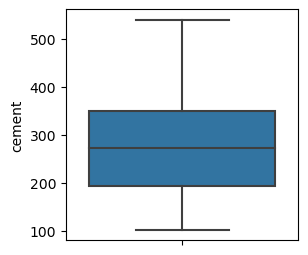

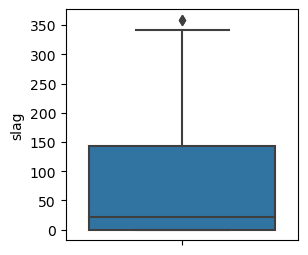

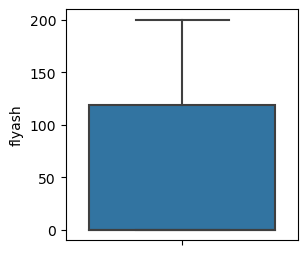

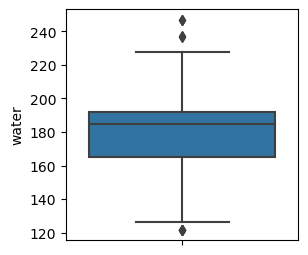

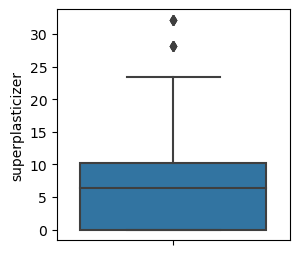

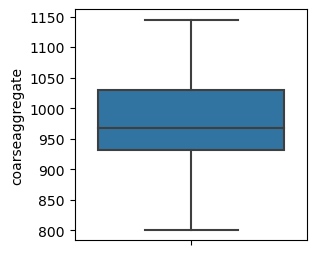

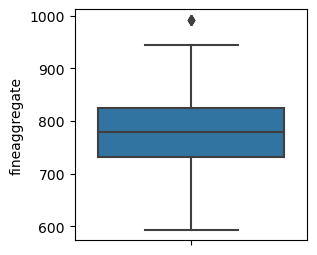

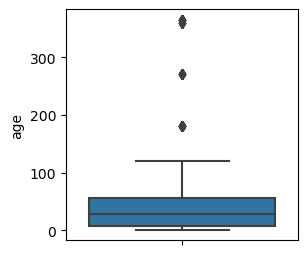

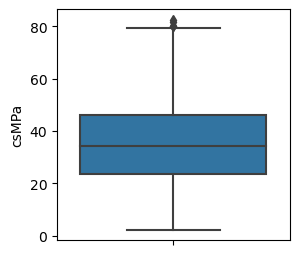

In [10]:
for i in df.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df,y =df[i])
    plt.show()

In [11]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<b>slag''water', 'superplasticizer,fineaggregate', 'age'has outliers

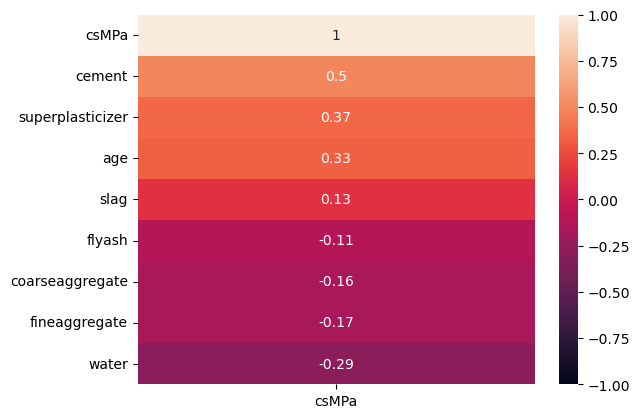

In [12]:
sns.heatmap(df.corr()[['csMPa']].sort_values(by = ['csMPa'],\
                                             ascending=False),vmin=-1,vmax =1,annot=True)
plt.show()


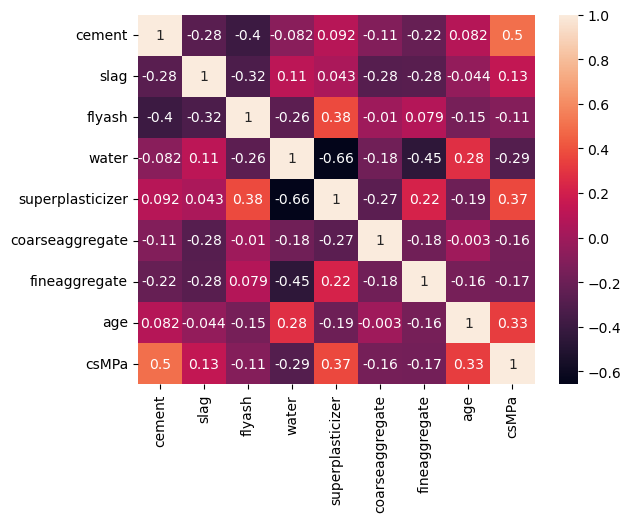

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

#### OUTLIER TREATMENT

In [15]:
def outlier_limit(col):
    Q3,Q1 =np.nanpercentile(col,[75,25])
    IQR= Q3-Q1
    UL = Q3+ 1.5*IQR
    LL = Q1- 1.5*IQR
    return UL,LL    

In [16]:
for i in df.columns:
    UL,LL = outlier_limit(df[i])
    df[i] = np.where((df[i]>UL) | (df[i]<LL),np.nan,df[i])

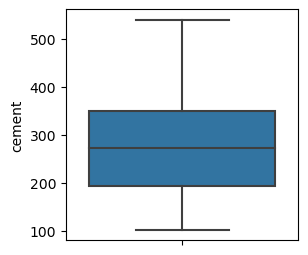

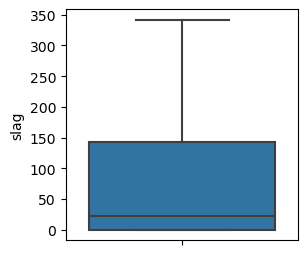

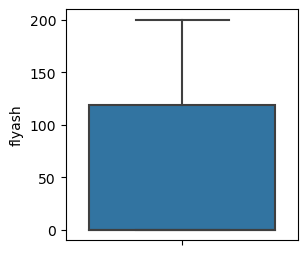

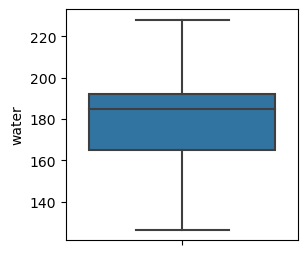

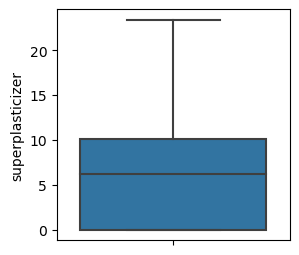

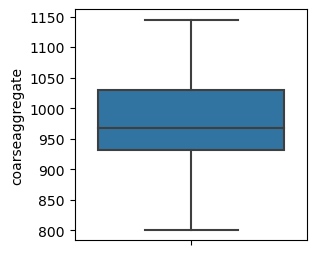

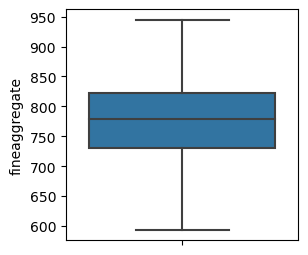

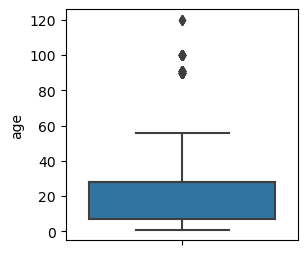

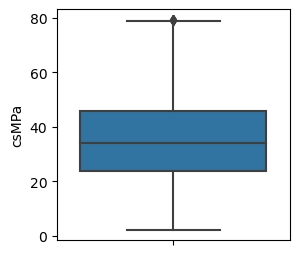

In [17]:
for i in df.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df,y =df[i])
    plt.show()

In [18]:
df.isnull().sum()

cement               0
slag                 2
flyash               0
water                9
superplasticizer    10
coarseaggregate      0
fineaggregate        5
age                 59
csMPa                4
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [20]:
palette=itertools.cycle(sns.color_palette())

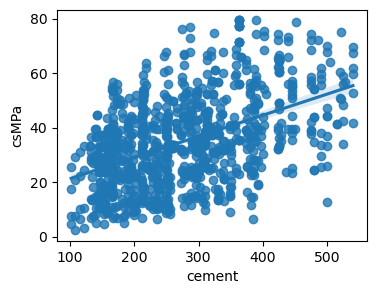

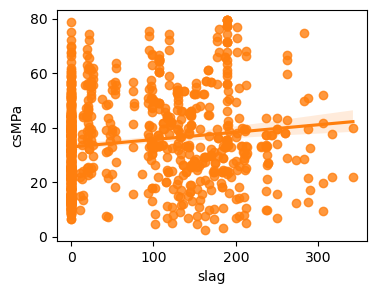

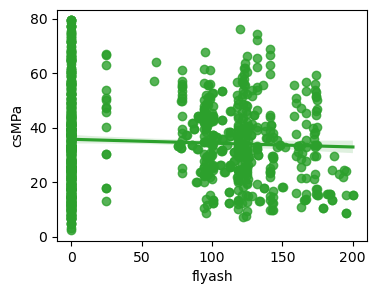

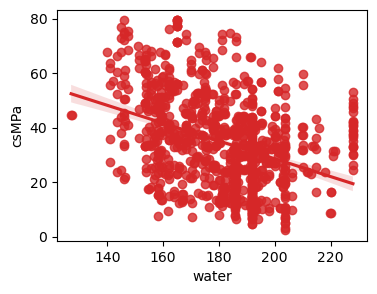

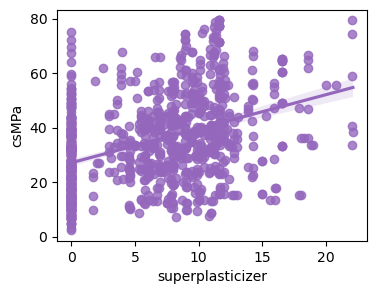

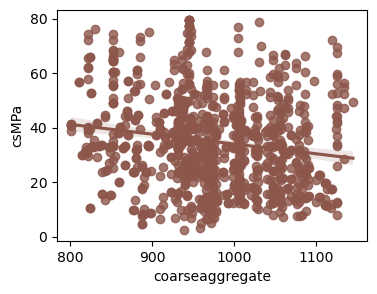

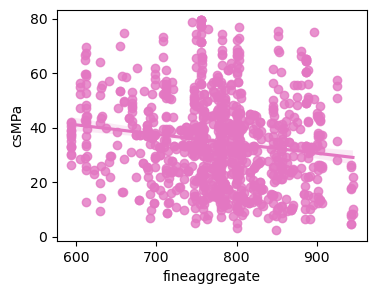

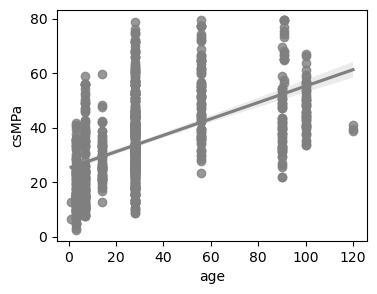

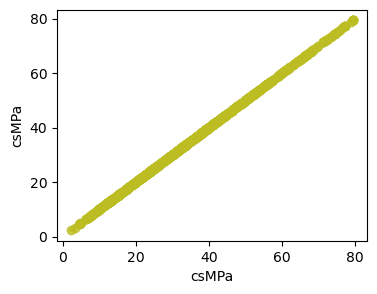

In [21]:
for i in df.columns:
    plt.figure(figsize=(4,3))
    sns.regplot(data=df, x=df[i], y='csMPa',color=next(palette))
    plt.show()

#### Correlation check

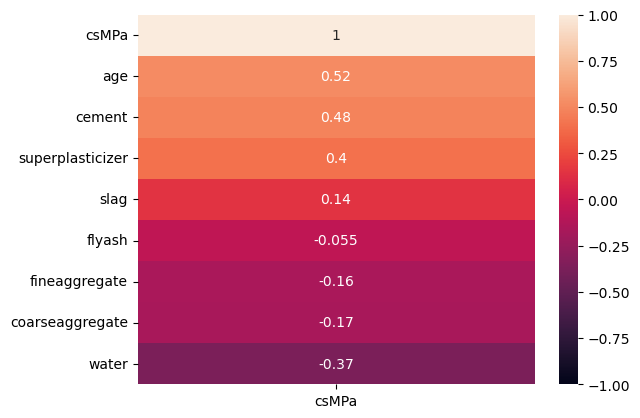

In [22]:
sns.heatmap(df.corr()[['csMPa']].sort_values(by = ['csMPa'],\
                                             ascending=False),vmin=-1,vmax =1,annot=True)
plt.show()

<b><center> Age,cement,superplasticizer,slag shows correlation

In [23]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


<b>NEW DATAFRAME AFTER DROPPING LESS CORRELATION VALUES

In [24]:
df1 =df.drop(columns=['flyash','water','coarseaggregate','fineaggregate'])

In [25]:
df1

,cement,slag,superplasticizer,age,csMPa
1,540.0,0.0,2.5,28.0,61.89
5,266.0,114.0,0.0,90.0,47.03
7,380.0,95.0,0.0,28.0,36.45
8,266.0,114.0,0.0,28.0,45.85
9,475.0,0.0,0.0,28.0,39.29
...,...,...,...,...,...
1025,276.4,116.0,8.9,28.0,44.28
1026,322.2,0.0,10.4,28.0,31.18
1027,148.5,139.4,6.1,28.0,23.70
1028,159.1,186.7,11.3,28.0,32.77


In [26]:
x = df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [27]:
x

array([[540. ,   0. ,   2.5,  28. ],
       [266. , 114. ,   0. ,  90. ],
       [380. ,  95. ,   0. ,  28. ],
       ...,
       [148.5, 139.4,   6.1,  28. ],
       [159.1, 186.7,  11.3,  28. ],
       [260.9, 100.5,   8.6,  28. ]])

In [28]:
sc= StandardScaler()

In [29]:
x =sc.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2, \
                                                shuffle=True, random_state=42)

<b>CHECKING ACCURACY FOR DIFFERENT MODELS

In [31]:
models = {
        'LinearRegression':LinearRegression(),
          'Ridge':Ridge(),
          'Lasso':Lasso(),
          'LinaerSVR':LinearSVR(),
          'DecisionTreeRegressor':DecisionTreeRegressor(),
          'GradientBoostingRegressor':GradientBoostingRegressor(),
          'AdaboostRegressor':AdaBoostRegressor(),
          'RandomForestRegressor':RandomForestRegressor(random_state=0)
         }

In [32]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('Model trained with {}'.format(name))
    trainingscore = model.score(x_train,y_train)*100
    testingscore =model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse =np.sqrt(mse)
    print('trainingscore',trainingscore)
    print('testingscore',testingscore)
    print('r2score',score)
    print('mae',mae)
    print('mse',mse)
    print('rmse',rmse)
    print('*'*100,"\n")
    

Model trained with LinearRegression
trainingscore 72.72919572007407
testingscore 71.39747134442506
r2score 0.7139747134442506
mae 6.793407569202989
mse 74.36114968714249
rmse 8.623291116919484
**************************************************************************************************** 

Model trained with Ridge
trainingscore 72.72903934984186
testingscore 71.39115029288723
r2score 0.7139115029288723
mae 6.795323910054361
mse 74.37758322227656
rmse 8.624243921775204
**************************************************************************************************** 

Model trained with Lasso
trainingscore 71.10426132969403
testingscore 68.77885845713449
r2score 0.687788584571345
mae 7.143999393975779
mse 81.16904654232282
rmse 9.009386579691363
**************************************************************************************************** 

Model trained with LinaerSVR
trainingscore 72.39825966359922
testingscore 70.7773954322259
r2score 0.707773954322259
mae 6.753665962675

In [33]:
gbr =GradientBoostingRegressor()

In [34]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [35]:
gbr.score(x_train,y_train)

0.9304552600694159

In [36]:
gbr.score(x_test,y_test)

0.8632708676070564

In [37]:
y_pred = gbr.predict(x_test)

In [38]:
output =pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

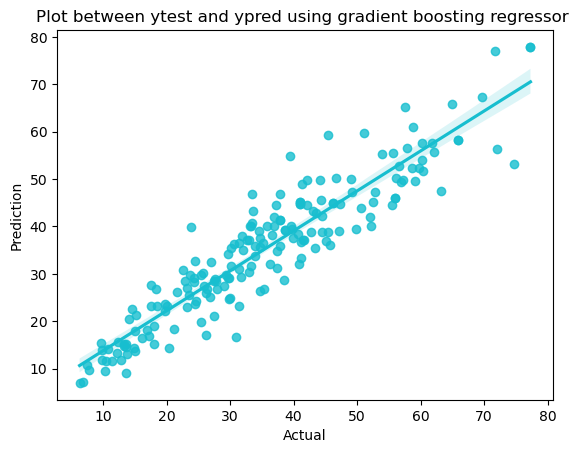

In [39]:
sns.regplot(data=output, x='Actual', y='Prediction',color= next(palette))
plt.title('Plot between ytest and ypred using gradient boosting regressor ')
plt.show()

In [40]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

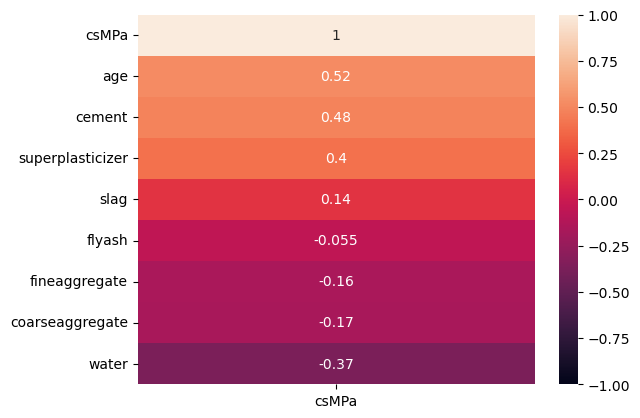

In [41]:
sns.heatmap(df.corr()[['csMPa']].sort_values(by = ['csMPa'],\
                                             ascending=False),vmin=-1,vmax =1,annot=True)
plt.show()

#### HYPERPARAMETRIC TUNING

In [46]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = r2_score(y_test,y_pred)
print(f'score before hyperparameter tuning is :{score}')

score before hyperparameter tuning is :0.8630235981628902


#### Boosting model accuracy using hyperparameter tuning

In [89]:
GBR =GradientBoostingRegressor(random_state=None)

In [90]:
parameters = {
    'learning_rate':[0.01,0.02,0.03,0.04],
    'subsample': [0.9,0.5,0.2,0.1],
    'n_estimators':[100,500,1000],
    'max_depth':[4,6,8],
    'random_state':[56]
    
}

In [91]:
grid_GBR = GridSearchCV(estimator= GBR,param_grid= parameters,cv =3,n_jobs=4,verbose= 3)

In [92]:
grid_GBR.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000], 'random_state': [56],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             verbose=3)

In [93]:
grid_GBR.best_params_

{'learning_rate': 0.03,
 'max_depth': 4,
 'n_estimators': 500,
 'random_state': 56,
 'subsample': 0.5}

#### Fitting the model using the best parameters

In [96]:
Best_Parameter_Model = GradientBoostingRegressor(learning_rate = 0.03,\
                                            max_depth =4, n_estimators= 500, subsample= 0.5)

In [97]:
Best_Parameter_Model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=500,
                          subsample=0.5)

In [98]:
y_pred = Best_Parameter_Model.predict(x_test)

In [99]:
Best_Parameter_Model.score(x_train, y_train)

0.9705118566759664

In [100]:
Best_Parameter_Model.score(x_test, y_test)

0.8949619804142598

In [101]:
r2_score(y_test, y_pred)

0.8949619804142598

#### So we got a score of 0.8949 after hyperparameter tuning